# Further validation test

This notebook is another test to validate our raytracing implementation. The Following angular power spectra were obtained without running the N-body simulation. \
The snapshots at different scale factors were create by using the [linear power spectrum ](https://github.com/DifferentiableUniverseInitiative/flowpm/blob/9145d0c846d886f2cb34955f2267aa8cc9da31da/flowpm/tfpm.py#L159) at the scale factor a=0.5229969 (with the order set to 1). 
The following power spectra are obtained averaging over 20 samples.
In this notebook, we will also try to investigate the behavior of the angular power spectrum for large scale for two differents values of the field and of the Box size.

Reference scale:

- lmax: 3000
- lmin: 300

In [2]:
%pylab inline
import pickle
import numpy as np
import DifferentiableHOS as DHOS
import tensorflow as tf
import jax_cosmo as jc
import jax
import jax_cosmo.power as power

Populating the interactive namespace from numpy and matplotlib


## Lensing fild 10x10 deg^2

Prototyping Settings:
- Nc: 128
- Box size :100
- Convergence map resolution: 1024
- Lensplane resolution: 256
- Number of lens: 22


In [3]:
work_path="/global/cscratch1/sd/dlan/kmaps_10fild/"
ps_arr = []
kmap=[]
for i in range(20):
    res = pickle.load( open( work_path+"map128__%d"%i, "rb" ) )
    kmap.append(res['map'])
    ell, power_spectrum = DHOS.statistics.power_spectrum(kmap[i][0,...,0],10., 1024)
    ps_arr.append(power_spectrum)

In [4]:
ps=tf.reduce_mean(ps_arr,axis=0)

Prototyping Settings:
- Nc: 128
- Box size :200
- Convergence map resolution: 1024
- Lensplane resolution: 256
- Number of lens: 11

In [5]:
res = pickle.load( open("result_10field_200box", "rb" ) )
ell_10_200=res['ell']
power_spectrum_10_200 =res['ps']

## Lensing fild 5x5 deg^2

Prototyping Settings:
- Nc: 128
- Box size :100
- Convergence map resolution: 512
- Lensplane resolution: 256
- Number of lens: 22

In [6]:
res = pickle.load( open("result_5field_100box", "rb" ) )
ell_5_100=res['ell']
power_spectrum_5_100 =res['ps']
    

Prototyping Settings:
- Nc: 128
- Box size :200
- Convergence map resolution: 512
- Lensplane resolution: 256
- Number of lens: 11

In [7]:
res = pickle.load( open("result_5field_200box", "rb" ) )
ell_5_200=res['ell']
power_spectrum_5_200 =res['ps']
    

# Jax-cosmo power spectrum 

In [8]:
cosmo=jc.Planck15()
nz =jc.redshift.delta_nz(0.92)
probes = [jc.probes.WeakLensing([nz])] 
cls = jc.angular_cl.angular_cl(cosmo, ell.numpy(), probes,nonlinear_fn=power.linear)

/global/homes/d/dlan/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:5293: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


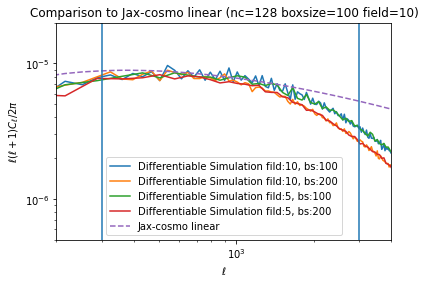

In [11]:
l=ell
loglog(l, l*(l+1)*ps/(2*pi),label='Differentiable Simulation fild:10, bs:100')
loglog(ell_10_200, ell_10_200*(ell_10_200+1)*power_spectrum_10_200/(2*pi),label='Differentiable Simulation fild:10, bs:200')
loglog(ell_5_100, ell_5_100*(ell_5_100+1)*power_spectrum_5_100 /(2*pi),label='Differentiable Simulation fild:5, bs:100')
loglog(ell_5_200, ell_5_200*(ell_5_200+1)*power_spectrum_5_200/(2*pi),label='Differentiable Simulation fild:5, bs:200')
loglog(l, l*(l+1)*cls[0]/(2*pi), '--',label='Jax-cosmo linear')
ylabel('$\ell(\ell+1)C_\ell /2\pi$')
xlim(2e2,4e3)
axvline(300)
axvline(3000)
xlabel('$\ell$')
title('Comparison to Jax-cosmo linear (nc=128 boxsize=100 field=10)')
ylim(5e-7, 2e-5)
legend()
savefig('lti_ini_cut.png',dpi=200)

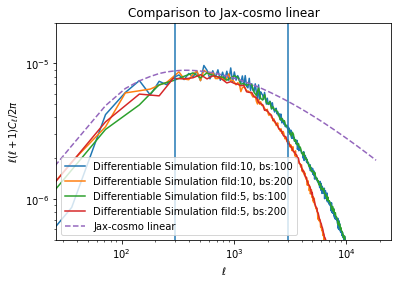

In [12]:
loglog(l, l*(l+1)*ps/(2*pi),label='Differentiable Simulation fild:10, bs:100')
loglog(ell_10_200, ell_10_200*(ell_10_200+1)*power_spectrum_10_200/(2*pi),label='Differentiable Simulation fild:10, bs:200')
loglog(ell_5_100, ell_5_100*(ell_5_100+1)*power_spectrum_5_100 /(2*pi),label='Differentiable Simulation fild:5, bs:100')
loglog(ell_5_200, ell_5_200*(ell_5_200+1)*power_spectrum_5_200/(2*pi),label='Differentiable Simulation fild:5, bs:200')
loglog(l, l*(l+1)*cls[0]/(2*pi), '--',label='Jax-cosmo linear')
ylabel('$\ell(\ell+1)C_\ell /2\pi$')
axvline(300)
axvline(3000)
xlabel('$\ell$')
title('Comparison to Jax-cosmo linear')
ylim(5e-7, 2e-5)
legend()
savefig('lti_ini_nocut.png',dpi=200)